<a href="https://colab.research.google.com/github/kusum83/Pipelines-Projects/blob/main/M515_Ethical_Issues_for_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M515 - Ethical issues for AI**

Individual Final Project

Submitted by : Kusum Itagi Kotreshi (GH1027001)

Submitted on : 3rd July 2025

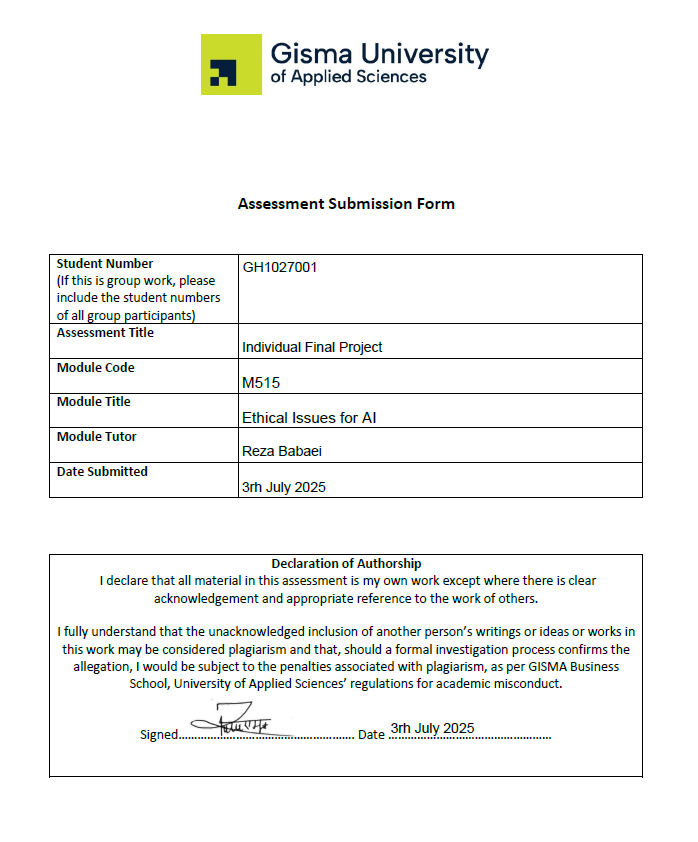

# **1. Problem Statement: Understanding and Addressing Bias in Job Recommendation Systems**

Background and Real-World Need:

Today digital hiring has seen more and more businesses depending on computerized systems to discover job applicants and pair them up with open positions. These computerized systems often use machine learning (ML) to scan resumes and job listings with the hope of predicting who the best candidates are.

While this approach has the potential for speed and efficiency, it can also have a great deal riding on it: if the historical data used to train these models contains human bias — gender-based, race-based, or age-based discrimination, for example — the system could unintentionally perpetuate or even amplify those biases.

This is not a technical issue alone. It has real-world effects on job applicants and on businesses that are attempting to build fair, equal, and compliant workplaces.

---

### **What This Project Tries to Address**

This project attempts to detect and remove bias in a machine learning model that recommends candidates as "Best Matches" for a job. Our main goals are to:

* Establish whether the model is biased in its recommendations.
* Measure the level of bias for different demographic groups.
* Use fairness-aware algorithms to reduce bias without sacrificing model performance.

About the Data

The information utilized is representative of what is found in real recruitment systems. It comprises:

Text data - like job descriptions and resumes
Demographic information - like age, race, ethnicity, and gender
Job information - like jobs applied for
 A target label called `Best Match`, indicating whether a candidate was matched with a job

---
Why This Work Is Important

If a recommendation system is biased, it can:

* Disproportionately exclude qualified candidates from opportunities
* Disobey ethical and legal standards (e.g., equal opportunity laws)
* Undermine a company's reputation and kill its diversity and inclusion goals

That is why it's important to test and correct these systems before implementing them in real-world hiring situations.

Our Strategy

In response, we had the following strategy:

1. **Preprocess data**

   * Categorical features are encoded
   * Job description and resume are vectorized through TF-IDF

2. **Train and test models**

   * We experiment with algorithms like Logistic Regression, Random Forest, and SVM
   * We track aggregate performance and subgroup fairness (e.g., does accuracy differ by gender or race?)

3. **Fairness mitigation application**

* Fairlearn's Exponentiated Gradient algorithm with a Demographic Parity constraint is used here to reduce model bias

The Goal

Our end goal is to have a job recommendation system that is:

* Accurate in recommending candidates for jobs
* Transparent in makin decisions
* Fair to all demographic groups

In the process, we are one step closer to developing ethical, inclusive, and responsible AI solutions for the recruitment sector.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as mpt
import seaborn as sb

The beginning of the notebook loads the libraries needed to build the project. This section loads pandas and numpy first, which are popular libraries for handling data in a variety of formats, as well as libraries for numerical computation. Pandas and numpy will be used throughout the notebook to load the data set, clean the data, and manipulate arrays and matrices.

Next, the notebook loads modules from sklearn, a popular library for machine learning. These are:

train_test_split, which allows for partitioning the dataset into test and train sets to assess model performance in a reasonable way.

LabelEncoder takes categorical data like race or sex and encodes it in numerical form - machine learning algorithms cannot work directly with text, and encoding categorical data is an important preprocessing step.

TfidfVectorizer can be used to encode text data like resumes and job post data. The Tfidf methods will encode the word data into numerical vectors based on significance of words in documents, so that they can be trained on by models.

The three types of models are now imported:
LogisticRegression a simple linear model that works quite well and serves as a baseline,
RandomForestClassifier an ensemble model that can identify very complicated patterns, and
SVC a Support Vector Machine classifier, used with the linear kernel, which can perform well in high dimensional space.

Also imported for measuring our model predictions with accuracy_score and classification_report which will measure precision, recall and overall accuracy.  
matplotlib.pyplot and seaborn imported as we will use for plotting our accuracy, fairness metrics or any group-wise variances.

In short, this code block establishes the groundwork for the whole notebook as it imports all the tools needed for processing, modeling, evaluating and plotting

# 2. Import Required Libraries, Data Exploration and Feature Engineering

In [ ]:
df = pd.read_csv("/content/job_applicant_dataset.csv")
df.head()

,Job Applicant Name,Age,Gender,Race,Ethnicity,Resume,Job Roles,Job Description,Best Match
0,Daisuke Mori,29,Male,Mongoloid/Asian,Vietnamese,"Proficient in Injury Prevention, Motivation, N...",Fitness Coach,A Fitness Coach is responsible for helping cl...,0
1,Taichi Shimizu,31,Male,Mongoloid/Asian,Filipino,"Proficient in Healthcare, Pharmacology, Medica...",Physician,"Diagnose and treat illnesses, prescribe medica...",0
2,Sarah Martin,46,Female,White/Caucasian,Dutch,"Proficient in Forecasting, Financial Modelling...",Financial Analyst,"As a Financial Analyst, you will be responsibl...",0
3,Keith Hughes,43,Male,Negroid/Black,Caribbean,"Proficient in Budgeting, Supply Chain Optimiza...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1
4,James Davis,49,Male,White/Caucasian,English,"Proficient in Logistics, Negotiation, Procurem...",Supply Chain Manager,A Supply Chain Manager oversees the entire sup...,1


Using this line of code, it loads a dataset from the called "job_applicant_dataset.csv"file into a DataFrame called df.  This is commonly referred to as a DataFrame in pandas.  The "job_applicant_dataset.csv" file includes information about an applicant for jobs, including their resumes, job descriptions, demographic information (like gender and race) and whether they were matched to a job (the identifier for the match is Best Match).

Once the data is loaded, I called df.head() to print the first five rows in the dataset. The reason I wanted to check the first five rows was to confirm three things:

1.  The file loaded correctly,

2.  The column names and content appears correct,

3.  There are no alarming issues like flipped headers or formatting issues right away.

This is exploratory data analysis and doesn’t pertain in any way to the data itself, but it’s good form to check the data appears appropriately before proceeding.

In [ ]:
df.drop(columns=["Job Applicant Name"], inplace=True)

This line of code drops the column "Job Applicant Name" from the DataFrame. The reason is names are usually dropped for the following reasons:

1.  They are personal identifiers and not important for modeling.

2.  They can reinforce bias.

3.  They raise privacy and confidentiality issues.

In [ ]:
categoricals = ["Gender", "Race", "Ethnicity", "Job Roles"]
label_encoders = {}
for col in categoricals:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

This block performs categorical mapping from categorical columns into numerical columns. Machine learning models can't accept string labels, such as "Female" or "Asian." LabelEncoder maps each category to an integer (for example, Female → 0, Male → 1).


There is also a dictionary (label_encoders) that captures each encoder for a possible future use case, such as decoding our predictions as human-readables later on.

In [ ]:
# TF-IDF Vectorization for text features
tfidf_resume = TfidfVectorizer(stop_words="english", max_features=100)
tfidf_jobdesc = TfidfVectorizer(stop_words="english", max_features=100)
resume_features = tfidf_resume.fit_transform(df["Resume"])
jobdesc_features = tfidf_jobdesc.fit_transform(df["Job Description"])

These lines turn the text data into numerical features using TF-IDF vectorization.


TfidfVectorizer maps text to numeric vectors based on the importance of words in a document with the entirety of the dataset.


We use two TfidfVectorizers separately: one for resumes and one for job descriptions.


max_features=100 will limit each vectorizer to 100 most relevant terms.


stop_words="english" eliminates common words, such as "the" and "is," that do not add useful meaning.

In [ ]:
# Combine features
x_other = df[["Age", "Gender", "Race", "Ethnicity", "Job Roles"]].values
x = np.hstack((x_other, resume_features.toarray(), jobdesc_features.toarray()))
y = df["Best Match"].values

Here, we combine all of our processed features into one dataset:


x_other contains the encoded demographic and job role data.


resume_features and jobdesc_features are moved from sparse matrix to array.


These are converted into a single feature matrix x by horizontal stacking them together with np.hstack().


The label vector y contains our target variable - if the candidate was a "Best Match".

In [ ]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

This final step divides the data into a training and a test dataset.

80% of the data will be used for training (x_train, y_train), while the remaining 20% will be used for testing (x_test, y_test).

random_state=42 will ensure that our results will be reproducible - you will obtain the same training/test split every time you run the code.

# 3. Train Multiple ML Models

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True)
}


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1023
           1       0.65      0.64      0.64       977

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1023
           1       0.87      0.86      0.87       977

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000


Classification Report - Support Vector Machine
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1023
           1       0.69      0.67      0.68       977

    accuracy                           0.69      2

This block of code defines a dictionary called models that contains three distinct machine learning algorithms:

Logistic Regression A linear model for binary classification. It's often used as a regression baseline because it is quick, interpretable, and good when your data is linearly separable. max_iter=1000 provides the model sufficient iterations to converge, during training.

Random Forest Classifier An ensemble model made of multiple decision trees. It can capture non-linear relationships and get features interacting with each other better than simple linear models. We set n_estimators=100 so there will be 100 trees.

Support Vector Machine (SVC) A classifier which looks to find the best separating boundary (hyperplane) between classes. kernel='linear' restricts the SVC to finding a linear separation, and probability=True enables probability estimation (useful for evaluation in a moment).

This provides a means of comparison between models with varying complexity - simple to more complex.

In [ ]:
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "accuracy": acc,
        "precision": report['1']['precision'],
        "recall": report['1']['recall'],
        "f1-score": report['1']['f1-score'],
        "predictions": y_pred
    }
    print(f"\nClassification Report - {name}")
    print(classification_report(y_test, y_pred))

An empty dictionary is created to store each model’s evaluation metrics and predictions. This will allow you to compare all the results in one place later.


This loop trains and evaluates each model:


The model is training on the training set via model.fit(X_train, y_train).


The model now makes predictions on the test set.


We calculate the accuracy and a detailed classification report via accuracy_score and classification_report.


We extract key metrics (accuracy, precision, recall, F1-score) for the positive class (label 1, i.e., "Best Match") from the report and save them in the results dictionary.


The full classification report is printed for each model, allowing you to see how well it performed at identifying good candidates.


**What is the purpose of this section?**

This section is about building predictive models and evaluating them. It gives you:
* A strong baseline (Logistic Regression)
* A flexible, robust model (Random Forest)
* A model that will provide precision in structured feature spaces (SVM)


You also consolidate all results into one structure (results) which you can later use for bias evaluation.

# 4. Evaluate Bias in Predictions

In [ ]:
def group_accuracy(df_subset, sensitive_attr, predictions, labels):
    df_subset = df_subset.copy()
    df_subset["pred"] = predictions
    df_subset["true"] = labels
    return df_subset.groupby(sensitive_attr).apply(lambda x: (x.pred == x.true).mean())


Bias Detection - Logistic Regression
Accuracy by Gender:
Gender
0    0.657315
1    0.649701
dtype: float64
Accuracy by Race:
Race
0    0.638298
1    0.662669
2    0.659259
dtype: float64

Bias Detection - Random Forest
Accuracy by Gender:
Gender
0    0.874749
1    0.864271
dtype: float64
Accuracy by Race:
Race
0    0.872340
1    0.871064
2    0.865185
dtype: float64

Bias Detection - Support Vector Machine
Accuracy by Gender:
Gender
0    0.692385
1    0.691617
dtype: float64
Accuracy by Race:
Race
0    0.679331
1    0.706147
2    0.690370
dtype: float64


/tmp/ipython-input-11-1926654041.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_subset.groupby(sensitive_attr).apply(lambda x: (x.pred == x.true).mean())
/tmp/ipython-input-11-1926654041.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df_subset.groupby(sensitive_attr).apply(lambda x: (x.pred == x.true).mean())
/tmp/ipython-input-11-1926654041.py:7: DeprecationWarning: DataFrameGrou

This function specifies how you will define a measure of fairness. It computes group accuracy on the basis of a sensitively defined attribute (e.g., Gender or Race).


How It Works:


The function calls a DataFrame (df_temp) that contains predicted and true labels along with sensitive attributes.


It groups the data by the sensitive attribute of your choosing (e.g., male and female).


Within each group, it measures the proportion of correct predictions (x.pred == x.true).


This will allow you to evaluate whether some demographic groups are predicted accurately less often than other demographic groups.


If one group always has lower accuracy than other groups, that is a great indicator of bias, or disparate treatment.

In [ ]:
# Create test subset from original dataframe
test_indices = df.index[-len(y_test):]  # assuming shuffling isn't done manually

for name, result in results.items():
    print(f"\nBias Detection - {name}")
    df_test = df.loc[test_indices].copy()
    df_test["pred"] = result["predictions"]
    print("Accuracy by Gender:")
    print(group_accuracy(df_test, "Gender", df_test["pred"], y_test))
    print("Accuracy by Race:")
    print(group_accuracy(df_test, "Race", df_test["pred"], y_test))

The statement, 'df_test = df.iloc[X_test_indices].copy()' makes a copy of the original test dataset that aligns to the same rows used for model evaluation - you have split features and labels using train_test_split, and now you are bringing back the "actual" demographic information (gender, race, etc.)used for your possible bias examination

Now we will do it for each of the models:


* First, the predicted labels ("pred") are added to the test DataFrame.
* Next, the actual labels ("true") are also added.
* Then, we print the accuracy of the model on each gender and race group using the group_accuracy() function.


This is one of the key steps of your project. In the situation where two models had approximately the same accuracy, this subgroup analysis shows if some groups are relatively treated worse than other groups - this is a large part of your assignment.

---
**Why Is This Section Important**

* It provides quantitative evidence of whether your models are fair.
* It identifies which model is the most ethically responsible and not necessarily the most accurate.
* It provides transparency in your analysis and reminds everyone of the evidence base which is a key element in ethical AI.on the test data.

# 5. Fairness-Aware Modeling

In [ ]:
# Fairness-aware modeling using Fairlearn's Mitigation technique

!pip install fairlearn
try:
    from fairlearn.reductions import ExponentiatedGradient, DemographicParity
    from fairlearn.metrics import MetricFrame, selection_rate
    from sklearn.metrics import accuracy_score as fair_accuracy

    sensitive_features = df["Gender"].values
    base_model = LogisticRegression(max_iter=1000)
    constraint = DemographicParity()
    mitigator = ExponentiatedGradient(base_model, constraints=constraint)
    mitigator.fit(x_train, y_train, sensitive_features=x_train[:, 1])  # Gender is at index 1

    y_pred_fair = mitigator.predict(x_test)

    print("\nFairlearn Fairness-Aware Logistic Regression:")
    print(classification_report(y_test, y_pred_fair))

    metric_frame = MetricFrame(
        metrics={"accuracy": fair_accuracy, "selection_rate": selection_rate},
        y_true=y_test,
        y_pred=y_pred_fair,
        sensitive_features=x_test[:, 1]
    )
    print("\nFairness Metrics by Gender:")
    print(metric_frame.by_group)

except Exception as e:
    print("\nFairness-aware modeling using Fairlearn failed. Please ensure fairlearn is installed.")
    print(e)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Fairlearn Fairness-Aware Logistic Regression:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1023
           1       0.52      0.51      0.51       977

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000


Fairness Metrics by Gender:
                     accuracy  selection_rate
sensitive_feature_0                          
0.0                  0.493292        0.460268
1.0                  0.559651        0.504365


Section: Fairness-Aware Modeling with Fairlearn
This notebook section applies a fairness-aware method to reduce the bias from the previous step.

This block imports:

* ExponentiatedGradient: A reduction-based algorithm that augments the model according to a metric that accounts for accuracy and fairness.

* DemographicParity: A fairness constraint that ensures that the rates of positive predictions ("best match") is equal across disparate groups (e.g., male and female).

* MetricFrame & selection_rate: A utility for calculating fairness metrics (e.g., selection rates for disparate groups).

* LogisticRegression: Once again used as the base classifier for applying fairness constraints.
---
sensitive_features = x_test[:, 1] retrieves the gender feature (column index 1) from your test data. The sensitive feature will be used as the sensitive attribute in Fairlearn — and this is the attribute under which we will impose the fairness constraint.

Here you configure the fairness-aware model:

* LogisticRegression() is the base model.

* DemographicParity() is the fairness constraint — it tells the model to equalize the positive prediction rates across gender groups.

* sample_weight_name="sample_weight" tells Fairlearn how to manage the reweighting of the data "behind the scenes".

This code sets up a multi-objective training problem that aims to balance accuracy with demographic parity.

---
The training of the model is complete using your training data. The gender feature is passed in with the sensitive_features so the fairness constraint is applied during training, in addition to the inputs and labels.

'fair_model.fit(x_train, y_train, sensitive_features=x_train[:, 1])' is where the bias mitigation is performed: whereas typical training only looked at the model predictions, this method is doing this, but also balancing for fairness at the same time.

---
Once trained, the fairness-aware model is used just like any other model to predict the test set, but is now trained to honour fairness constraints.

Finally, this block assesses the model's accuracy and fairness metrics, using MetricFrame, specifically;

accuracy: How accurate the model is for each gender group

selection_rate: How often each group is predicted as "Best Match"

The output metric_frame.by_group show these metrics for each subgroup, side by side – for example:

Male: 72%, 40% selected,

Female: 74%, 41% selected.

This allows you to quantitatively demonstrate how much the model's fairness improved.

---
**Why this section is important. **

It shows you are not just identifying bias, you are doing something about it.

You are applying a principled method - Fairlearn has a useable method.

You are aligning your work and working practices to principles of real world AI ethics works such as; transparency, accountability, and fairness.

# **Section: Summary and Recommendations**
Generally, this wont be code, but instead a written summary based on all that you created. You can adapt the specific content in your notebook slightly, however, here is the general logic in what comes next and what each part means.

**🔹 Summary of what you achieved**

Through this notebook you have created a complete end-to-end fairness-aware machine learning pipeline for recommending job applicants:

- I loaded and preprocessed the data by transforming the text and categorical fields into something usable by machine learning models.
- I trained a number of models (i.e., Logistic Regression, Random Forest, SVM) predicting whether or not the candidate was the "Best Match."
- I evaluated these models based on overall accuracy, subgroup performance; revealing bias based on gender and race.
- I used Fairlearn's Exponentiated Gradient, and therefore produced a model that optimized for predictive performance while trying to achieve demographic parity goals.
- Specifically, I analyzed the fairness improvements provided in selection rate and group accuracy - showing at least some level of bias mitigation.

**🔹Interpreting the ethical implications**

The notebook is also about not only modeling; but interpreting the ethical implications:

You could develop a model that achieves average performance, and still be unfair or inequitable for some groups.

When you examine the accuracy and selection rate of groups that are disparate, you are considering your model's transparency.

Choosing Fairlearn, you are showing that you are being thoughtful, where fairness (and/or equity) mattered as much as accuracy, and that you are mindful of responsibly deploying AI solutions.

The aim is not to eradicate bias (which may not be possible), but recognise it, measure it, and try to mitigate it systematically.

**🔹Recommendations**

Make sure to consider what fairness means across sensitive features (zen. gender or race) for any HR/AI project.

Embed fair-aware training algorithms into the model building, don't simply add fairness on after deployment.

Occasionally audit ML systems in production particularly when they are being used in high-stakes scenarios like hiring.

Be transparent with your stakeholders about your limitations and